<br><br><b>Resumen del Notebook:</b><br><br>Lo que se busca aqui es brindar herramientas para poder crear conjunto de datos mediante imagenes o video de la cual pueda ser utilizado en modelos de ML & DL que involucre el uso de imagenes. Asi mismo se brinda la posibilidad de agregar la etiqueta a cada imagen.<br><br>
Al mismo se inicia con unos bloques de codigo de Pre-Procesamiento para poder trabajar con imagenes u otros datos. Asi como la normalizacion de los mismos y finalmente la separacion de los datos en grupos para modelos (train-test) mediante el cual se pueda tener mejores resultados.<br><br>

# Librerias

In [4]:
# librerias

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import keyboard 
import time
import ipywidgets as widgets
from ipywebrtc import CameraStream, ImageRecorder, VideoRecorder, AudioRecorder, VideoStream
from ipywidgets import Video
import PIL.Image
import PIL
import io
from tkinter import *
import os
import re
import matplotlib as mpl
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
from kneed import KneeLocator
import joblib
import mglearn
from IPython.display import Image
import sklearn as skl
from IPython import display
import glob
import imageio
import time
import tensorflow as tf
import scipy

# fin

# (Previo - No Principal) Herramientas de Preprocesamiento de Datos

## Conversion de Dimension y Agrupamiento de datos en una Matriz

### Conversion Numpy -> Tensorflow & Tensorflow -> Numpy

In [79]:
# conversion de numpy a tensorflow y viceversa

## tf.convert_to_tensor(numpy) ....... convertir numpy a tensor
## tensor_tf.numpy() ...... convertir tensor a numpy

arr = np.random.uniform(low=0.,high=1.,size=(3,5,7)) # 3D
print('Dimension Numpy: ',arr.shape)

# convertir a tf
arr_tf= tf.convert_to_tensor(arr, dtype=tf.float32)
print('Dimension TF: ',arr_tf.shape)

# convertir a numpy de nuevo
arr_num = arr_tf.numpy()
print('Dimension Numpy: ',arr_num.shape)

####################################################
##### Validacion de correcta reconstruccion ########

# verificar integridad de los datos
dife = np.abs(arr-arr_num)
difes = np.sum(dife)
print('--------------------------------------------------')
print('Error Reconstruccion: ',difes)
print('\n')

# fin

Dimension Numpy:  (3, 5, 7)
Dimension TF:  (3, 5, 7)
Dimension Numpy:  (3, 5, 7)
--------------------------------------------------
Error Reconstruccion:  8.55393851528774e-07




### Numpy Moveaxis --- Mover ejes de matriz

In [101]:
# conversion de numpy a tensorflow y viceversa

## tf.convert_to_tensor(numpy) ....... convertir numpy a tensor
## tensor_tf.numpy() ...... convertir tensor a numpy

arr = np.random.uniform(low=0.,high=1.,size=(3,5,7)) # 3D
print('Dimension Numpy: ',arr.shape)

# convertir a tf
arr_tf= tf.convert_to_tensor(arr, dtype=tf.float32)
print('Dimension TF: ',arr_tf.shape)

# convertir a numpy de nuevo
arr_num = arr_tf.numpy()
print('Dimension Numpy: ',arr_num.shape)

####################################################
##### Validacion de correcta reconstruccion ########

# verificar integridad de los datos
dife = np.abs(arr-arr_num)
difes = np.sum(dife)
print('--------------------------------------------------')
print('Error Reconstruccion: ',difes)

#####################################################

# Mover eje:

# Ejemplo: Mover el eje 0 (primera dimension) al eje 1 (segunda dimension) .. Y el eje -1 (ultimo eje) al eje 0 (primera dimension)
eje_inicio = [0,-1] 
eje_fin = [1,0]
# es un mapeo uno a uno (elementwise) :  eje_inicio -> eje_fin  .... donde eje_inicio[j] -> eje_fin[j]  (Misma posicion de elemento) 

# mover ejes en base a lo indicado (inicio -> fin)
arr_num_movido = np.moveaxis(arr_num, eje_inicio, eje_fin)

print('--------------------------------------------------')
print('Inicio : ',eje_inicio)
print('Fin    : ',eje_fin)
print('Dimension Origen: ',arr_num.shape)
print('Dimension Movido: ',arr_num_movido.shape)
print('\n')

# fin

Dimension Numpy:  (3, 5, 7)
Dimension TF:  (3, 5, 7)
Dimension Numpy:  (3, 5, 7)
--------------------------------------------------
Error Reconstruccion:  1.08582814917213e-06
--------------------------------------------------
Inicio :  [0, -1]
Fin    :  [1, 0]
Dimension Origen:  (3, 5, 7)
Dimension Movido:  (7, 3, 5)




### Compactar varias imagenes en una sola matriz o tensor

In [80]:
# SOLO NUMPY ----- compactar en un solo objeto 

datos =[] # Lista para guardar todas las imagenes creadas
num =  213 # cantidad imagenes a crear

# se indica el eje a usar para concatenar ... eje dimensional de la matriz
eje = 0 
## Se recomienda solo probar con eje=0 (primera dimension) o eje= -1 (ultima dimension)

for i in range(num):
    imag = np.random.uniform(low=0.,high=1.,size=(25,40,3)) # Imagen RGB ... 3 canales
    datos.append(imag) 

# Concatenar todas las imagenes de la "Lista"
total = np.stack(datos,axis=eje)

print('\n\nEje de concatena  : ',eje)
print('Cantidad imagenes : ',num)
print('Dimension imagen  : ',imag.shape)
print('--------------------------------------------------')
print('Resultado de concatenacion')
print('Dimension final: ',total.shape)    

####################################################
##### Validacion de correcta reconstruccion ########

errore = 0 ## sumar diferencia entre original - reconstruido
for i in range(num):
    if(eje==0):
        errore += np.sum(np.abs(datos[i]-total[i,...])) ## las elipsis '...' indican todos los ejes 
    elif(eje==-1):
        errore += np.sum(np.abs(datos[i]-total[...,i])) ## las elipsis '...' indican todos los ejes
    else:
        print('Debe modificar codigo de errore para el eje indicado : ',eje)

print('--------------------------------------------------')
print('Error Reconstruccion: ',errore)
print('\n')

# fin



Eje de concatena  :  0
Cantidad imagenes :  213
Dimension imagen  :  (25, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (213, 25, 40, 3)
--------------------------------------------------
Error Reconstruccion:  0.0




### TF + NUMPY --- Objecto compacto

In [81]:
#  TENSORFLOW + NUMPY ----- compactar en un solo objeto 

datos =[] # Lista para guardar todas las imagenes creadas
datos_tf = [] # Lista para guardar en imagenes de tf
num =  123  # cantidad imagenes a crear

# se indica el eje a usar para concatenar ... eje dimensional de la matriz
eje = 0
## Se recomienda solo probar con eje=0 (primera dimension) o eje= -1 (ultima dimension)

for i in range(num):
    imag = np.random.uniform(low=0.,high=1.,size=(25,40,3)) # Imagen RGB ... 3 canales
    imag_tf = tf.convert_to_tensor(imag, dtype=tf.float32)
    datos_tf.append(imag_tf)
    datos.append(imag)

# Concatenar todas las imagenes de la "Lista"
total_tf = tf.stack(datos_tf,axis=eje)

print('\n\nEje de concatena  : ',eje)
print('Cantidad imagenes : ',num)
print('Dimension imagen  : ',imag.shape)
print('--------------------------------------------------')
print('Resultado de concatenacion')
print('Dimension final: ',total_tf.shape)    

####################################################
##### Validacion de correcta reconstruccion ########

errore = 0 ## sumar diferencia entre original - reconstruido
for i in range(num):
    if(eje==0):
        errore += np.sum(np.abs(datos_tf[i]-total_tf[i,...])) ## las elipsis '...' indican todos los ejes 
    elif(eje==-1):
        errore += np.sum(np.abs(datos_tf[i]-total_tf[...,i])) ## las elipsis '...' indican todos los ejes
    else:
        print('Debe modificar codigo de errore para el eje indicado : ',eje)

print('--------------------------------------------------')
print('Error Reconstruccion: ',errore)
print('\n')

# fin



Eje de concatena  :  0
Cantidad imagenes :  123
Dimension imagen  :  (25, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (123, 25, 40, 3)
--------------------------------------------------
Error Reconstruccion:  0.0




### Resize de imagenes  con Tensorflow



Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  0.06864374
Valor maximo rescale:  0.94234544
Metodo inter/extra-polacion:  bilinear


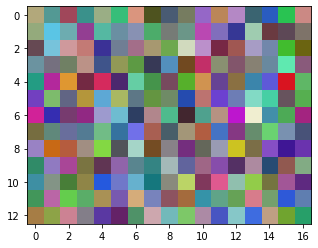

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  -0.091890365
Valor maximo rescale:  1.0921062
Metodo inter/extra-polacion:  lanczos3


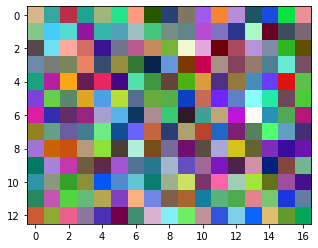

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  -0.1569776
Valor maximo rescale:  1.1699207
Metodo inter/extra-polacion:  lanczos5


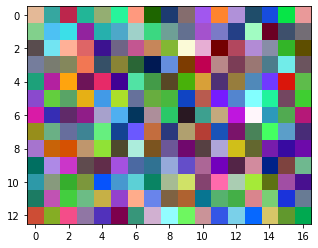

***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  0.028891133
Valor maximo rescale:  0.99519324
Metodo inter/extra-polacion:  bicubic


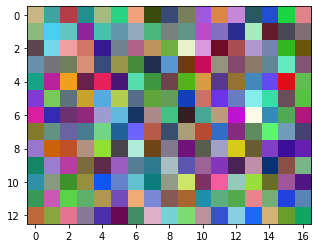

***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  0.09900489
Valor maximo rescale:  0.90251845
Metodo inter/extra-polacion:  gaussian


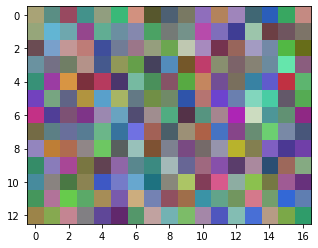

***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  2.4143712e-05
Valor maximo rescale:  0.9994049
Metodo inter/extra-polacion:  nearest


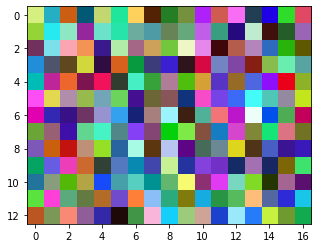

***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  0.23977958
Valor maximo rescale:  0.7654644
Metodo inter/extra-polacion:  area


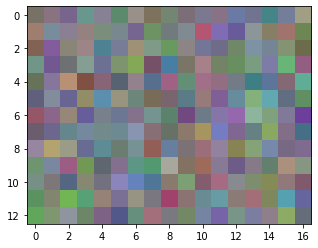

***********************************************
***********************************************


Eje de concatena  :  0
Cantidad imagenes :  5
Dimension imagen  :  (45, 40, 3)
--------------------------------------------------
Resultado de concatenacion
Dimension final:  (5, 45, 40, 3)
--------------------------------------------------
Resultado imagenes Resize
Dimension inicial  :  (45, 40, 3)
Dimension escalada :  (13, 17, 3)
Dimension final    :  (5, 13, 17, 3)
Valor mínimo rescale:  0.064528376
Valor maximo rescale:  0.94501513
Metodo inter/extra-polacion:  mitchellcubic


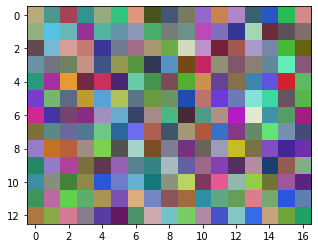

***********************************************
***********************************************


In [5]:
# resize de imagenes

###################################
######## Crear imagenes ###########

## Recordar: de numpy a tf : tf.convert_to_tensor(imagen, dtype=tf.float32)
## Recordar: de tf a numpy: tensor.numpy()

datos =[] # Lista para guardar todas las imagenes creadas
datos_tf = [] # Lista para guardar en imagenes de tf
num = 5 # cantidad imagenes a crear

# se indica el eje a usar para concatenar ... eje dimensional de la matriz
eje = 0
## Se recomienda solo probar con eje=0 (primera dimension) o eje= -1 (ultima dimension)

for i in range(num):
    imag = np.random.uniform(low=0.,high=1.,size=(45,40,3)) # Imagen RGB ... 3 canales
    imag_tf = tf.convert_to_tensor(imag, dtype=tf.float32)
    datos_tf.append(imag_tf)
    datos.append(imag)

total_tf = tf.stack(datos_tf,axis=eje)

#####################################

# indicar nueva dimension
nueva_dimension = (13, 17) # solo se modifica las 2 primeras dimensiones (2D)...ya que la 3 era dimension es canal de color
preservar_aspecto = False 
# Cambiar de tamaño de imagenes

# Alternativas de metodo de interpolacion - extrapolacion
## 0: bilinear 
## 1: lanczos3
## 2: lanczos5
## 3: bicubic
## 4: gaussian
## 5: nearest
## 6: area
## 7: mitchellcubic

# metodos inter/extra-polacion
metodos_nombre = ['bilinear','lanczos3','lanczos5','bicubic','gaussian','nearest','area','mitchellcubic']

for idx in metodos_nombre:
    metodo = idx 
    resized = tf.image.resize(total_tf, nueva_dimension, preserve_aspect_ratio = preservar_aspecto , antialias=False, method = metodo)

    print('\n\nEje de concatena  : ',eje)
    print('Cantidad imagenes : ',num)
    print('Dimension imagen  : ',imag.shape)
    print('--------------------------------------------------')
    print('Resultado de concatenacion')
    print('Dimension final: ',total_tf.shape)    
    print('--------------------------------------------------')
    print('Resultado imagenes Resize')
    print('Dimension inicial  : ',imag.shape)
    print('Dimension escalada : ',resized[0].shape)
    print('Dimension final    : ',resized.shape)
    print('Valor mínimo rescale: ',np.min(resized[0].numpy()))
    print('Valor maximo rescale: ',np.max(resized[0].numpy()))

    # Mostrar imagen escalada
    print('Metodo inter/extra-polacion: ',metodo)
    plt.imshow(resized[0])
    plt.show() 
    print('***********************************************')
    print('***********************************************')
    

# fin

### Recortar  imagenes  con Tensorflow


Dimension inicial de imagenes concatenadas: (15, 100, 100, 3)

Dimension inicial:  (100, 100, 3)
Muestra de imagen inicial:


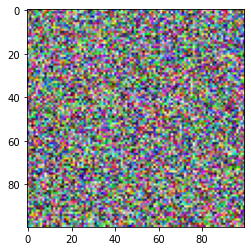




Dimension de imagenes concatenadas y recortadas: (15, 35, 55, 3)

Dimension final:  (35, 55, 3)
Muestra de imagen final:


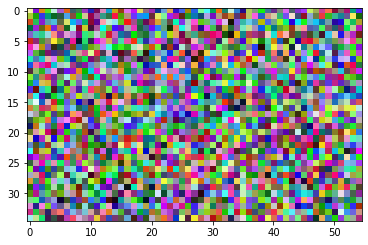

In [10]:
# Recortar imagenes

##################################
######## Crear imagenes ###########

## Recordar: de numpy a tf : tf.convert_to_tensor(imagen, dtype=tf.float32)
## Recordar: de tf a numpy: tensor.numpy()

datos =[] # Lista para guardar todas las imagenes creadas
datos_tf = [] # Lista para guardar en imagenes de tf
num = 15 # cantidad imagenes a crear

# se indica el eje a usar para concatenar ... eje dimensional de la matriz
eje = 0
## Se recomienda solo probar con eje=0 (primera dimension) o eje= -1 (ultima dimension)

for i in range(num):
    imag = np.random.uniform(low=0.,high=1.,size=(100,100,3)) # Imagen RGB ... 3 canales
    imag_tf = tf.convert_to_tensor(imag, dtype=tf.float32)
    datos_tf.append(imag_tf)
    datos.append(imag)

# Sintetizar a un unico tensor todas las imagenes 3D
total_tf = tf.stack(datos_tf,axis=eje)

print('\nDimension inicial de imagenes concatenadas:',total_tf.shape)

# ver muestra de imagen
imag = total_tf[0].numpy()
print('\nDimension inicial: ',imag.shape)
print('Muestra de imagen inicial:')
plt.imshow(imag)
plt.show()
print('\n')

# Recorte basado en punto inicial (x_offset, y_offset) y la dimension de la nueva imagen
x_offset = 5
y_offset = 40
ancho = 35
alto =  55


# recortar imagen (crop)
recortado = tf.image.crop_to_bounding_box(total_tf, x_offset, y_offset, ancho,alto)

print('\nDimension de imagenes concatenadas y recortadas:',recortado.shape)

# ver imagen recortada
imag = recortado[0].numpy()
print('\nDimension final: ',imag.shape)
print('Muestra de imagen final:')
plt.imshow(imag)
plt.show()
print('\n')


# fin

## Split - Shuffle - KFold para generacion de Conjuntos de Train/Test (Dataset split)

In [142]:
# Split

## Datos ######

###################################
######## Crear imagenes ###########

datos =[] # Lista para guardar todas las imagenes creadas
datos_tf = [] # Lista para guardar en imagenes de tf
num = 100 # cantidad imagenes a crear

# se indica el eje a usar para concatenar ... eje dimensional de la matriz
eje = 0
## Se recomienda solo probar con eje=0 (primera dimension) o eje= -1 (ultima dimension)

for i in range(num):
    imag = np.random.uniform(low=0.,high=1.,size=(45,40,3)) # Imagen RGB ... 3 canales
    imag_tf = tf.convert_to_tensor(imag, dtype=tf.float32)
    datos_tf.append(imag_tf)
    datos.append(imag)

# Concatenar todas las imagenes de la "Lista"
total_tf = tf.stack(datos_tf,axis=eje)   ## en tesor tf
total = np.stack(datos,axis=eje)         ## en matriz numpy

###################################
    
# Se definen enteros como etiqueta o salida
y = np.random.randint(low=0,high=5,size=(total.shape[0]),dtype=int) ## igual que la primera dimension

###################################
    
print('\n\nDimension Numpy: ',total.shape)
print('Dimension TF : ' ,total_tf.shape)
print('Dimension Y : ' ,y.shape)

###################################

# porcentaje de corte en el split
tamano = 0.2   # valor entre 0-1 (representa porcentaje de datos para Test).. recomendable 0.2 (20%)

########################################
######## Split en TF ###################

try:
    total_tf = total_tf.numpy()
    xtrainf, xtestf, ytrainf, ytestf = skl.model_selection.train_test_split(total_tf,y,test_size= tamano, random_state=0, shuffle=True)

    total_tf = tf.convert_to_tensor(total_tf)
    xtrainf = tf.convert_to_tensor(xtrainf)
    xtestf = tf.convert_to_tensor(xtestf)
    ytrainf = tf.convert_to_tensor(ytrainf)
    ytestf = tf.convert_to_tensor(ytestf)

    print('\nTensorflow:')
    print('X orig dim: ',total_tf.shape)
    print('X train dim: ',xtrainf.shape)
    print('X test dim: ',xtestf.shape)
    print('-------------------------------------')
    print('Y orig dim: ',y.shape)
    print('Y train dim: ',ytrainf.shape)
    print('Y test dim: ',ytestf.shape)
except:
    print('No se pudo leer tensor TF')

#######################################   
######### Split en Numpy  #############

try:
    xtrain, xtest, ytrain, ytest = skl.model_selection.train_test_split(total,y,test_size= tamano, random_state=0, shuffle=True)
    print('\nNumpy:')
    print('X orig dim: ',total.shape)
    print('X train dim: ',xtrain.shape)
    print('X test dim: ',xtest.shape)
    print('-------------------------------------')
    print('Y orig dim: ',y.shape)
    print('Y train dim: ',ytrain.shape)
    print('Y test dim: ',ytest.shape)
except:
    print('No se pudo leer Numpy')    
    

#######################################   
######### Kfold en Numpy  #############

# cantidad de particiones
splits = 5

kf = skl.model_selection.KFold(n_splits=splits,shuffle=True,random_state=0)
ii=1
print('\n\n**************************************************')
print('**************************************************')
print('\nKFold split')
print('------------------------------------')
for train_indice, test_indice in kf.split(total):
    print('\n-----------------------')
    print('Iteracion: ',ii)
    ii +=1
    xtrain2, xtest2 = total[train_indice],total[test_indice]
    ytrain2, ytest2 = y[train_indice],y[test_indice]
    print('X orig dim: ',total.shape)
    print('X train dim: ',xtrain2.shape)
    print('X test dim: ',xtest2.shape)
    print('-------------------------------------')
    print('Y orig dim: ',y.shape)
    print('Y train dim: ',ytrain2.shape)
    print('Y test dim: ',ytest2.shape)
    
    
#######################################   
######### Reapeated Kfold en Numpy  #############

# cantidad de particiones
splits = 5
repeticiones = 2 # cantidad de repeticiones

kf = skl.model_selection.RepeatedKFold(n_splits=splits,n_repeats=repeticiones,random_state=0)
ii=1
print('\n\n**************************************************')
print('**************************************************')
print('\nRepeated KFold split')
print('------------------------------------')
for train_indice, test_indice in kf.split(total):
    print('\n-----------------------')
    print('Iteracion: ',ii)
    ii +=1
    xtrain2, xtest2 = total[train_indice],total[test_indice]
    ytrain2, ytest2 = y[train_indice],y[test_indice]
    print('X orig dim: ',total.shape)
    print('X train dim: ',xtrain2.shape)
    print('X test dim: ',xtest2.shape)
    print('-------------------------------------')
    print('Y orig dim: ',y.shape)
    print('Y train dim: ',ytrain2.shape)
    print('Y test dim: ',ytest2.shape)
    
    
#######################################   
######### Stratified Kfold en Numpy  #############

# cantidad de particiones
splits = 5

## Stratified KFold busca preservar el mismo porcentaje de relacion en todos los cortes (split) entre las clases (y)
## Esto es vital en caso alguna clase de los datos "y" tenga una proporcion muy superior/inferior a los datos de otras
## clases... Imaginar que hay 20 datos con y=1 y hay 500 datos con y=2 ... aqui hay una desproporcion desigual.
## en esos casos se recomienda usar Stratified KFold para tratar de mantener la proporcion de datos en train y test datasets


kf = skl.model_selection.StratifiedKFold(n_splits=splits)
ii=1
print('\n\n**************************************************')
print('**************************************************')
print('\nStratified KFold split')
print('------------------------------------')
for train_indice, test_indice in kf.split(total,y):
    print('\n-----------------------')
    print('Iteracion: ',ii)
    ii +=1
    xtrain2, xtest2 = total[train_indice],total[test_indice]
    ytrain2, ytest2 = y[train_indice],y[test_indice]
    print('X orig dim: ',total.shape)
    print('X train dim: ',xtrain2.shape)
    print('X test dim: ',xtest2.shape)
    print('-------------------------------------')
    print('Y orig dim: ',y.shape)
    print('Y train dim: ',ytrain2.shape)
    print('Y test dim: ',ytest2.shape)
    
# fin



Dimension Numpy:  (100, 45, 40, 3)
Dimension TF :  (100, 45, 40, 3)
Dimension Y :  (100,)

Tensorflow:
X orig dim:  (100, 45, 40, 3)
X train dim:  (80, 45, 40, 3)
X test dim:  (20, 45, 40, 3)
-------------------------------------
Y orig dim:  (100,)
Y train dim:  (80,)
Y test dim:  (20,)

Numpy:
X orig dim:  (100, 45, 40, 3)
X train dim:  (80, 45, 40, 3)
X test dim:  (20, 45, 40, 3)
-------------------------------------
Y orig dim:  (100,)
Y train dim:  (80,)
Y test dim:  (20,)


**************************************************
**************************************************

KFold split
------------------------------------

-----------------------
Iteracion:  1
X orig dim:  (100, 45, 40, 3)
X train dim:  (80, 45, 40, 3)
X test dim:  (20, 45, 40, 3)
-------------------------------------
Y orig dim:  (100,)
Y train dim:  (80,)
Y test dim:  (20,)

-----------------------
Iteracion:  2
X orig dim:  (100, 45, 40, 3)
X train dim:  (80, 45, 40, 3)
X test dim:  (20, 45, 40, 3)
--------

# Crear Graficas a mano alzada - (Con etiquetado)

### Codigo principal

<b>Importante:</b> Una vez se corra el bloque principal NO MOVER la interfaz GUI que aparecerá en pantalla. 
<br><br>
En caso detecte que las imagenes guardadas/grabadas no esten dentro del marco adecuado, puede corregirlo mediante sumar/restar valores a la siguiente parte del bloque de codigos (dentro de bucle <b>"main"</b>):
<br>
<code>
x=root.winfo_rootx()+root.winfo_x()
y=root.winfo_rooty()+root.winfo_y()
x1=x+root.winfo_width()
y1=y+root.winfo_height()
</code>
<br>

In [ ]:
# Creacion de dibujo a mano alzada (mouse)

# Parametros para funciones de dibujo ... no cambiar ni poner otros datos
b1 = "up"
xold, yold = None, None

#########################################################################################################

#######################################################
######## Variables de almacenamiento ##################

# agregar etiqueta a imagen generada
num_imagenes = list()  

# Además del numero el nombre del archivo generado... utiliza "num_imagenes"
num_imagenes_archivo = list()

# agregar etiqueta (label) a cada imagen ... hacen match con num_imagenes e num_imagenes_archivo
etiquetas = list()

# Dataframe con resultados
total = pd.DataFrame() # vacio

###########################################################################################################

def main():
    root = Tk()
    root.title("Canvas Draw")
    root.configure(background='white') ## color del background de la interfaz GUI
    drawing_area = Canvas(root,width=600,height=500)
    drawing_area.pack()
    drawing_area.bind("<Motion>", motion)
    drawing_area.bind("<ButtonPress-1>", b1down)
    drawing_area.bind("<ButtonRelease-1>", b1up)
    entrada = Entry(root,bd=20)
    entrada.config(font=('Arial', 12))
    entrada.pack(side=TOP,ipady=0)
    button4=Button(root,fg="green",text="Save",command=lambda:getter(drawing_area))
    button4.pack(side=RIGHT)
    button4.config(font=('Arial', 16))
    button4=Button(root,fg="green",text="Clear",command=lambda:delete(drawing_area))
    button4.pack(side=LEFT)
    button4.config(font=('Arial', 16))
    def delete(widget):
        widget.delete("all")
    def getter(widget):
        from PIL import ImageGrab
        #x=root.winfo_rootx()+widget.winfo_x()
        #y=root.winfo_rooty()+widget.winfo_y()
        x=root.winfo_rootx()+root.winfo_x()
        y=root.winfo_rooty()+root.winfo_y()
        x1=x+root.winfo_width()
        y1=y+root.winfo_height() - 47 ## se agrega un valor de correcion para recortar mejor el area de trabajo
        #########################################################
        nombres = list()

        for rootx, dirsx, filesx in os.walk("."):
            for filenamex in filesx:
                nombres.append(str(filenamex))
                #print(filename)
    
        #busca = '.jpg'  ## tipo de archivo a buscar
        #buscad = 'imag' # indicar el prefijo a buscar
        
        fil = list()
        fil_res = list()

        for idx in range(len(nombres)):
            aaa = nombres[idx]
            if re.search(busca, aaa):
                fil.append(aaa)
            else:
                pass

        for aax in fil:
            if re.search(busca, aax):
                auxi = re.split(busca,aax)
                if re.search(buscad, auxi[0]):
                    fil_res.append(int(re.split(buscad,str(auxi[0]))[1])) 
        
        # orderar lista
        fil_res= sorted(fil_res,reverse=True)
        if(len(fil_res)>0):
            imagen_n = fil_res[0]+1 # escoger ultimo numero de imagen y sumar 1
        else:
            imagen_n = 1 # imagen inicial
        print('\n----------------------------------')
        print('Numero de Imagen   : ',imagen_n)
        nomimag= buscad+str(imagen_n) + busca 
        print('Nombre archivo     : ',nomimag)
        num_imagenes.append(imagen_n)        # agregar valor del numero de archivo creado de imagen
        num_imagenes_archivo.append(nomimag) # guardar el archivo de imagen creada/guardada
        etiqueta_ingresada = entrada.get()   # leer texto ingresado
        print('Etiqueta ingresada : ',etiqueta_ingresada) # se guarda/registra el texto ingresado al GUI, como label de la imagen
        etiquetas.append(''+str(etiqueta_ingresada)) # en caso no se ingrese nada, se regitra solo '' (vacio)
        
        # Guardar/Recortar imagen creada
        ImageGrab.grab().crop((x,y,x1,y1)).save(nomimag)
    root.mainloop()
    
def b1down(event):
    global b1
    b1 = "down"
def b1up(event):
    global b1, xold, yold
    b1 = "up"
    xold = None
    yold = None

def motion(event):
    if b1 == "down":
        global xold, yold
        if xold is not None and yold is not None:
            event.widget.create_line(xold,yold,event.x,event.y,smooth=TRUE,width=ancho)
        xold = event.x
        yold = event.y
if __name__ == "__main__":
    busca = '.jpg'  # archivo de imagen a guardar
    formato = input('\n\nIngrese formato a guardar de imagen: ')
    if(len(formato)<2):
        busca='.jpg' ## se asigna por defecto tipo 'jpg'
    else:
        busca = '.' + formato # se agrega el '.' previo (ejemplo: se ingresa jpg ---> .jpg )
    print('Archivo terminará en: ',busca)
    buscad=input('Ingrese prefijo para archivo imagen: ')
    ancho = float(input('Grosor de lapiz a dibujar: '))
    main()
    
# fin

### Dataframe con datos de imagenes creadas y etiquetadas

In [ ]:
# Se crea un dataframe que tenga la informacion de las imagenes creadas y etiquetadas

total = pd.DataFrame() # se define dataframe vacio
total['nombre_archivo']=num_imagenes_archivo
total['numero']=num_imagenes
total['etiqueta']=etiquetas
total # ver df resultante

# fin

### Guardar a archivo Excel

In [ ]:
# guardar a excel

nombre_salida = 'dibujos_etiquetados'
total.to_excel(nombre_salida+'.xlsx')

# fin

# Recorte y Re-Escalado de Imagenes



Muestra de imagen original:
Dimension original:  (480, 640, 3)


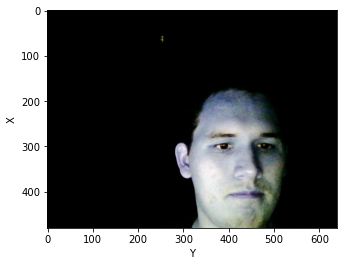


Ancho_offset:  250  ,Alto_offset:  100  ,Ancho:  300  ,Alto:  200


Dimension recorte:  (200, 300, 3)
Muestra de imagen recortada:


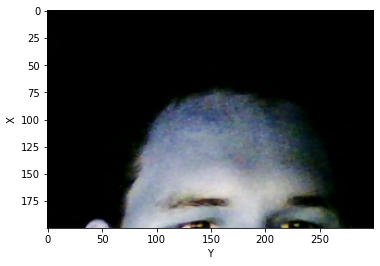




Nueva Dimension:  (30, 45)  ,Ancho:  45  ,Alto:  30  ,metodo:  bicubic  , preserva aspecto:  False


Muestra de imagen final (recorte + resize):
Dimension final:  (30, 45, 3)


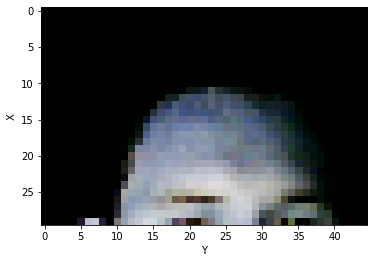

In [57]:
# leer Imagen tomada + Crop + Resize

## Escoger 01 imagen para mostrar resultados
# Escoger imagen aleatoria de la lista "guardadas"
idx = np.random.randint(0,len(guardadas),1)
idx = idx[0]

# cuidado que aqui se tiene la lista "guardadas" donde estan todas las imagenes 3D concatenadas

########################################################################################################################

## Imagen Original:
print('\n\nMuestra de imagen original:')
print('Dimension original: ',guardadas[idx].shape)
plt.imshow(guardadas[idx])
plt.xlabel('Y')
plt.ylabel('X')
plt.show()

# convertir a tensor (tf)
imag_tf = tf.convert_to_tensor(guardadas, dtype=tf.float32)

################## Ingresar Nuevas Dimensiones - Recorte imagen ########################
# Recorte basado en punto inicial (x_offset, y_offset) y la dimension de la nueva imagen
alto_offset = 100
ancho_offset = 250
alto = 200
ancho =  300

# info
print('\nAncho_offset: ',ancho_offset,' ,Alto_offset: ',alto_offset,' ,Ancho: ',ancho,' ,Alto: ',alto)

# recortar imagen (crop)
recortado = tf.image.crop_to_bounding_box(imag_tf, alto_offset, ancho_offset, alto,ancho)
recortado = recortado.numpy().astype(int)


print('\n\nDimension recorte: ',recortado[idx].shape)
print('Muestra de imagen recortada:')
plt.imshow(recortado[idx])
plt.xlabel('Y')
plt.ylabel('X')
plt.show()
print('\n')


# Cambiar de tamaño de imagenes
# Alternativas de metodo de interpolacion - extrapolacion
## 0: bilinear 
## 1: lanczos3
## 2: lanczos5
## 3: bicubic
## 4: gaussian
## 5: nearest
## 6: area
## 7: mitchellcubic


################## Ingresar Nuevas Dimensiones - Resize imagen ##########################
# recordar esta nueva dimension es (alto,ancho)
nueva_dimension = (30, 45) # solo se modifica las 2 primeras dimensiones (2D)...ya que la 3 era dimension es canal de color
preservar_aspecto = False
method = 'bicubic'

# info
print('\nNueva Dimension: ',nueva_dimension,' ,Ancho: ',nueva_dimension[1],' ,Alto: ',nueva_dimension[0],' ,metodo: ',method,' , preserva aspecto: ',preservar_aspecto)
# convertir a tensor (tf)
recortado = tf.convert_to_tensor(recortado, dtype=tf.float32)

# resize
resized = tf.image.resize(recortado, nueva_dimension, preserve_aspect_ratio = preservar_aspecto , antialias=False, method = metodo)
resized = resized.numpy().astype(int)

## Imagen Original:
print('\n\nMuestra de imagen final (recorte + resize):')
print('Dimension final: ',resized[idx].shape)
plt.imshow(resized[idx])
plt.xlabel('Y')
plt.ylabel('X')
plt.show()


# fin

# Libreria OpenCV

<br>Tener cuidado con OpenCV al leer o guardar imagenes, debido a que naturalmente OpenCV espera en un formato de colores tipo BGR que es el inverso de RGB<br>.
<br>
Para resolver esto se puede hacer:<br>
<b>imagen_rgb = imagen_bgr[...,::-1]</b><br>
<b>imagen_bgr = imagen_rgb[...,::-1]</b><br>
<br>
o por el otro lado simplemente usar su libreria:<br>
<br>
<b>imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)</b><br>
<b>imagen_bgr = cv2.cvtColor(imagen_rgv, cv2.COLOR_RGB2BGR)</b><br>
<br>
Cualquier de ambas invierte el orden de los canales (orden de capas de la matriz)<br>

## Generar Frames de foto tomadas + Etiquetado Manual (Entrada de video webcam)



Para finalizar el bucle presione tecla:  q
Para tomar una foto que sea guardada presione tecla:  t




Frame N°  1


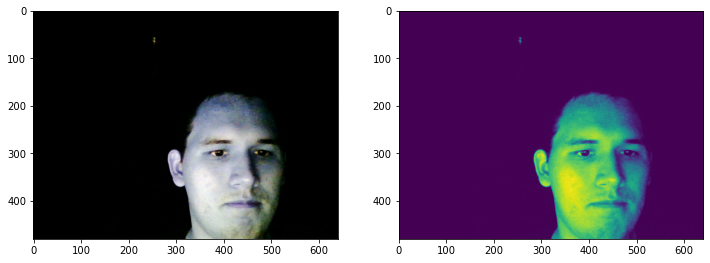

Ingrese etiqueta: 8
Valor etiq. registrada:  8


-------------------------------------------
Cantidad de frames tomados     :  1
Cantidad de etiquetas escritas :  1





In [11]:
# Video Streaming de webcam

# Definir objeto de webcam para tomar fotos
cap = cv2.VideoCapture(0)
# Ojo: VideoCapture(0) es la principal webcam
## VideoCapture(1) es la camara secundaria ... y asi VideoCapture(n-1) es la "n" camara 


# Tecla para finalizar bucle
key = 'q'
print('\n\nPara finalizar el bucle presione tecla: ',key)

# Tecla para guardar frame tomado
key_conca = 't'  
guardadas = [] # guardar frames en una lista

print('Para tomar una foto que sea guardada presione tecla: ',key_conca)
print('\n\n')

# Numero de frame tomado
ii = 0

# guardar etiquetas
etiquetas = list()

while(True):
    # Capturar frame por frame
    ret, frame = cap.read()

    # conversion BGR a RGB
    img_conv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtener ancho y alto de imagen ... brinda el aspecto de la imagen (proporcion ancho-alto)
    wid = int(img_conv.shape[1])
    hei = int(img_conv.shape[0])
    
    # Mostrar resultado en una interfaz diferente a la de Jupyter notebook
    cv2.imshow('frame',img_conv)
    
    # indica que se presionó botón
    indicador = cv2.waitKey(1) & 0xFF
    
    # En caso se presione "key" - terminar bucle
    if (indicador == ord(key)):
        break
    
    # En caso se presione "key_conca" -- guardar frame
    if (indicador == ord(key_conca)):
        # en caso se haya capturado una imagen
        if(ret):
            # se guarda ultimo frame tomado
            guardadas.append(frame)
            
            # Tamaño de figura dado por "tamano" (ancho de imagen horizontal) 
            tamano = 12
            ancho = np.round(tamano*(hei/wid),1) # reondear a 1 decimal 
            fig = plt.figure(figsize=(tamano,ancho)) # mantener el aspecto de la imagen original
            fig.add_subplot(1,2,1)
            plt.imshow(frame)
            fig.add_subplot(1,2,2)
            plt.imshow(img_conv)
            ii +=1 # aumentar la cuenta en 1
            print('\nFrame N° ',ii)
            plt.show() # mostrar frame capturado - original vs convertido
            valor = input('Ingrese etiqueta: ')
            print('Valor etiq. registrada: ',valor)
            etiquetas.append(valor) # guardar un acumulado de etiquetas

# Al final liberar recursos
cap.release()
cv2.destroyAllWindows()

print('\n\n-------------------------------------------')
print('Cantidad de frames tomados     : ',len(guardadas))
print('Cantidad de etiquetas escritas : ',len(etiquetas))
print('\n\n')


# fin

## Generar Frames de foto tomadas + Etiquetado Manual (Entrada de archivo video)

FPS video:  29.97002997002997


Para finalizar el bucle presione tecla:  q
Para tomar una foto que sea guardada presione tecla:  t




Frame N°  1


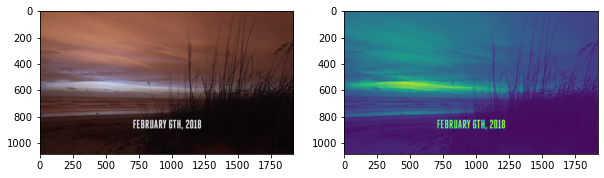

Ingrese etiqueta: 8
Valor etiq. registrada:  8

Frame N°  2


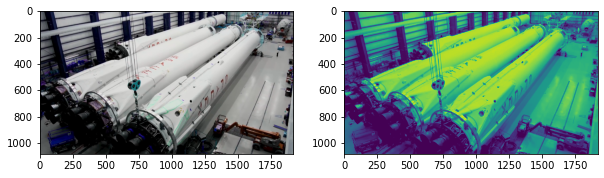

Ingrese etiqueta: 4
Valor etiq. registrada:  4

Frame N°  3


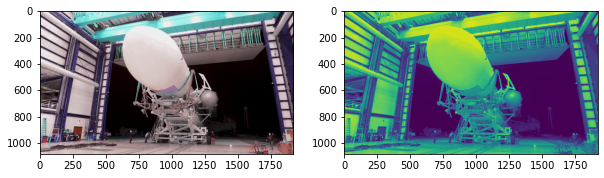

Ingrese etiqueta: 15
Valor etiq. registrada:  15

Frame N°  4


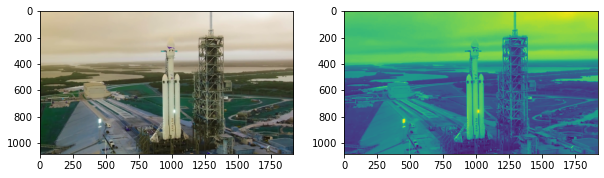

Ingrese etiqueta: 45
Valor etiq. registrada:  45

Frame N°  5


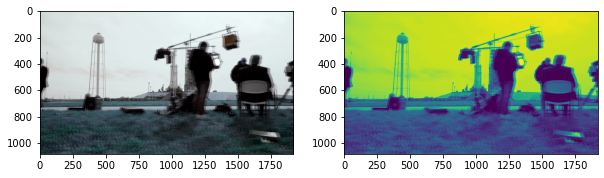

Ingrese etiqueta: 4
Valor etiq. registrada:  4

Frame N°  6


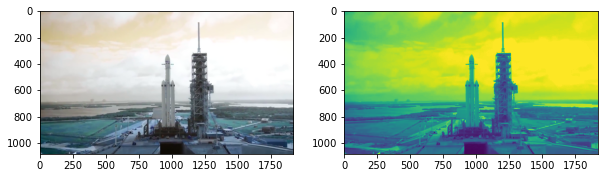

Ingrese etiqueta: 56
Valor etiq. registrada:  56


-------------------------------------------
Cantidad de frames tomados     :  6
Cantidad de etiquetas escritas :  6





In [2]:
# Video Streaming de webcam

# Definir objeto de webcam para tomar fotos
cap = cv2.VideoCapture('spacex.mp4')

# FPS del video leido
fps = cap.get(cv2.CAP_PROP_FPS)
print('FPS video: ',fps)

# Tecla para finalizar bucle
key = 'q'
print('\n\nPara finalizar el bucle presione tecla: ',key)

# Tecla para guardar frame tomado
key_conca = 't'  
guardadas = [] # guardar frames en una lista

print('Para tomar una foto que sea guardada presione tecla: ',key_conca)
print('\n\n')

# Numero de frame tomado
ii = 0

# guardar etiquetas
etiquetas = list()

while(True):
    # Capturar frame por frame
    ret, frame = cap.read()

    # conversion BGR a RGB
    img_conv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # cambiar tamaño de interfaz con video CV2
    scale = 50 # porcentaje de dimension con respecto a original ... poner valor entre 0 - 100
    wid = int(img_conv.shape[1]*scale/100.0)
    hei = int(img_conv.shape[0]*scale/100.0)
    dime = (wid,hei)
    resized = cv2.resize(img_conv, dime, interpolation = cv2.INTER_AREA)
    
    # Mostrar resultado en una interfaz diferente a la de Jupyter notebook
    cv2.imshow('frame',resized)
    
    # indica que se presionó botón
    indicador = cv2.waitKey(1) & 0xFF
    
    # En caso se presione "key" - terminar bucle
    if (indicador == ord(key)):
        break
    
    # En caso se presione "key_conca" -- guardar frame
    if (indicador == ord(key_conca)):
        # en caso se haya capturado una imagen
        if(ret):
            # se guarda ultimo frame tomado
            guardadas.append(frame)
            
            # Tamaño de figura dado por "tamano" (ancho de imagen horizontal) 
            tamano = 12  
            ancho = np.round(tamano*(hei/wid),1) # redondear a 1 decimales el aspecto de la imagen
            fig = plt.figure(figsize=(tamano,ancho)) # mantener aspecto de la imagen
            fig.add_subplot(1,2,1)
            plt.imshow(frame)
            fig.add_subplot(1,2,2)
            plt.imshow(img_conv)
            ii +=1 # aumentar la cuenta en 1
            print('\nFrame N° ',ii)
            plt.show() # mostrar frame capturado - original vs convertido
            valor = input('Ingrese etiqueta: ')
            print('Valor etiq. registrada: ',valor)
            etiquetas.append(valor) # guardar un acumulado de etiquetas
    
    # Generar un retraso proporcional al FPS del video para que parezca fluido
    retraso = np.round(0.6*1.0/fps,4) # redondear al tercer decimal
    time.sleep(retraso) # dar un retraso equivalente a 1/FPS para simular el delta tiempo entre frame y frame
    
    
# Al final liberar recursos
cap.release()
cv2.destroyAllWindows()

print('\n\n-------------------------------------------')
print('Cantidad de frames tomados     : ',len(guardadas))
print('Cantidad de etiquetas escritas : ',len(etiquetas))
print('\n\n')


# fin

## Imagen - foto

In [ ]:
# Capturar solo 01 imagen

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

print('Dimension leida: ',frame.shape)

# Our operations on the frame come here
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
print('Dimension convertida: ',img.shape)

# Display the resulting frame---original
print('Original leido')
plt.imshow(frame)
plt.show()

# Display the resulting frame--- convertido cv2
print('Convertido por CV2')
plt.imshow(img)
plt.show()

# Liberar recursos
cap.release()
cv2.destroyAllWindows()

# fin

## Leer archivos de foto

In [ ]:
# leer/mostrar imagenes

numero = 1
nombre = 'imagen'+str(numero)+'.jpg'

img = cv2.imread(nombre)
print('Imagen Original sin convertir:')
plt.imshow(img)
plt.show()

# cambiar de espacio BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Imagen Original luego  de convertir:')
plt.imshow(img)
plt.show()

numero2 = 1
guardar = 'hola_'+str(numero2)+'.jpg'
guardar_conv = 'hola_conv_'+str(numero2)+'.jpg'
    
# Conviertiendo de rgb a bgr
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(guardar,img)
print('Guardado bgr')

# sin convertir de rgb a bgr
cv2.imwrite(guardar_conv,img)
print('Guardado rgb')
    
########################################
############ Comprobar #################

print('\n\n--------------------------')

###### mostrar tal cual leida ##########

print('Leer archivos creados y mostrar directamente')

# Imagen sin convertir
img_l1 = cv2.imread(guardar)
print('Imagen guardada rgb')
plt.imshow(img_l1)
plt.show()

# Imagen Convertida
img_l2 = cv2.imread(guardar_conv)
print('Imagen guardada bgr')
plt.imshow(img_l2)
plt.show()

########################################
#### mostrar conversion anterior #######

print('\n\n--------------------------')
print('Leer archivos creados y convertir BGR-RGB')

# Imagen sin convertir - convertida
img_l1_c = cv2.cvtColor(img_l1, cv2.COLOR_BGR2RGB)
print('Imagen guardada rgb - convertida cv2')
plt.imshow(img_l1_c)
plt.show()

# Imagen Convertida - convertida
img_l2_c = cv2.cvtColor(img_l2, cv2.COLOR_BGR2RGB)
print('Imagen guardada bgr - convertida cv2')
plt.imshow(img_l2_c)
plt.show()


# fin

## Crear archivo de video con webcam

In [ ]:
## crear video

video = cv2.VideoCapture(0) 
   
# checkar si la camara esta abierta 
if(video.isOpened() == False):
    print("No se puede abrir camara") 

# ancho (width) y alto (height) de video 
frame_width = int(video.get(3)) 
frame_height = int(video.get(4)) 

# tamaño de imagen: width x height
size = (frame_width, frame_height) 

nombre_archivo = 'video_prueba.avi' 
result = cv2.VideoWriter(nombre_archivo, cv2.VideoWriter_fourcc(*'MJPG'), 10, size) 
# VideoWriter(filename, fourcc, FPS, framesize)
# donde:
## filename: nombre archivo con extension (.avi , etc)
## fourcc: codigo de 4 digitos para compresion de frames
## FPS: frames por segundo
## size : tamaño de frame "width x height"

# grabar video e ir agregando continuamente al archivo
while(True): 
    ret, frame = video.read() 
    
    # en caso se haya leido video
    if ret == True:  
        
        # escribir frame leido al archivo de video abierto
        result.write(frame) 
  
        # mostrar el frame registrado 
        cv2.imshow('Frame', frame) 
  
        # Presionar la tecla "s" para finalizar el bucle y terminar el video 
        if cv2.waitKey(1) & 0xFF == ord('s'): 
            break
  
    # en caso no se haya registrado nuevo frame, finalizar el bucle infinito "while"
    else: 
        break

# Liberar recursos y variable de video
video.release() 

# Finalizar video
result.release() 

# se ha creado un video en el archivo indicado "nombre_archivo"

# fin